# IPython 与 RQAlpha

## 加载 RQAlpha magic

In [3]:
%load_ext rqalpha

The rqalpha extension is already loaded. To reload it, use:
  %reload_ext rqalpha


## 查看 RQAlpha magic 帮助

我们可以通过 `%%rqalpha` 直接在 `cell` 中运行回测代码。 `%%rqalpha` 后面的参数等价于在 CLI 中后面的 `rqalpha run` 的参数

In [2]:
%%rqalpha -h
""

Usage: ipykernel_launcher.py [OPTIONS]

  Start to run a strategy

Options:
  -h, --help                      Show this message and exit.
  -d, --data-bundle-path PATH
  -f, --strategy-file PATH
  -s, --start-date DATE
  -e, --end-date DATE
  -bm, --benchmark TEXT
  -mm, --margin-multiplier FLOAT
  -a, --account TEXT...           set account type with starting cash
  -fq, --frequency [1d|1m|tick]
  -rt, --run-type [b|p]
  --resume
  --source-code TEXT
  -l, --log-level [verbose|debug|info|error|none]
  --disable-user-system-log       disable user system log stdout
  --disable-user-log              disable user log stdout
  --locale [cn|en]
  --extra-vars TEXT               override context vars
  --enable-profiler               add line profiler to profile your strategy
  --config TEXT                   config file path
  -mc, --mod-config TEXT...       mod extra config
  --stock-t1 / --no-stock-t1      [sys_accounts] enable/disable stock T+1
  --report PATH                   [sys_anal

## 使用 %%rqalpha 进行回测

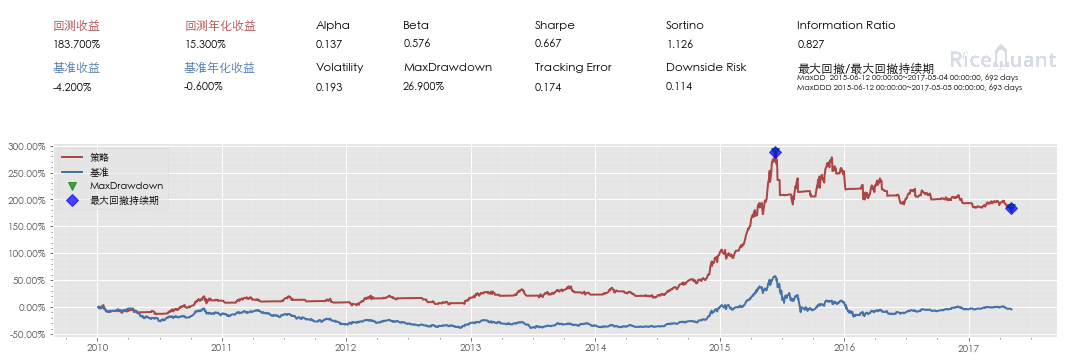

In [3]:
%%rqalpha -s 20100101 -e 20170505 -p -bm 000001.XSHG --account stock 100000

def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']

    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        #logger.info("positions hs300: " + str(hsQuality) + ", zz500: " + str(zzQuality) + ", gz: " + str(gzQuality))

## 获取回测报告

运行完回测后，报告会自动存储到 `report` 变量中。可以直接通过 `report` 变量获取当次回测的结果。

另外 rqalpha 的 mod 的输出会自动存储在 `results` 变量中。

In [4]:
results.keys()

dict_keys(['sys_analyser'])

In [5]:
report.keys()

dict_keys(['summary', 'trades', 'portfolio', 'benchmark_portfolio', 'stock_account', 'stock_positions'])

In [6]:
report.trades[:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2010-01-04 15:00:00,79.961424,1498453688,122.34,817,000012.XSHG,1498453672,None,BUY,国债指数,0,2010-01-04 15:00:00,79.961424
2010-01-06 15:00:00,79.948352,1498453689,122.32,817,000012.XSHG,1498453673,None,SELL,国债指数,0,2010-01-06 15:00:00,79.948352
2010-01-06 15:00:00,76.444704,1498453690,4550.28,21,000905.XSHG,1498453674,None,BUY,中证500(沪),0,2010-01-06 15:00:00,76.444704
2010-01-07 15:00:00,74.913888,1498453691,4459.16,21,000905.XSHG,1498453675,None,SELL,中证500(沪),0,2010-01-07 15:00:00,74.913888
2010-01-07 15:00:00,78.180552,1498453692,122.31,799,000012.XSHG,1498453676,None,BUY,国债指数,0,2010-01-07 15:00:00,78.180552


In [7]:
report.portfolio[:5]

,cash,market_value,static_unit_net_value,total_value,unit_net_value,units
date,,,,,,
2010-01-04,-31.741,99951.78,1.000,99920.039,0.999200,100000.0
2010-01-05,-31.741,99902.76,0.999,99871.019,0.998710,100000.0
2010-01-06,4191.426,95555.88,0.999,99747.306,0.997473,100000.0
2010-01-07,-44.999,97725.69,0.997,97680.691,0.976807,100000.0
2010-01-08,-44.999,97733.68,0.977,97688.681,0.976887,100000.0


In [8]:
report.stock_positions[:5]

,avg_price,last_price,market_value,order_book_id,quantity,symbol
date,,,,,,
2010-01-04,122.34,122.34,99951.78,000012.XSHG,817,国债指数
2010-01-05,122.34,122.28,99902.76,000012.XSHG,817,国债指数
2010-01-06,122.34,122.32,0.00,000012.XSHG,0,国债指数
2010-01-06,4550.28,4550.28,95555.88,000905.XSHG,21,中证500(沪)
2010-01-07,4550.28,4459.16,0.00,000905.XSHG,0,中证500(沪)


## 使用 run_func 运行回测

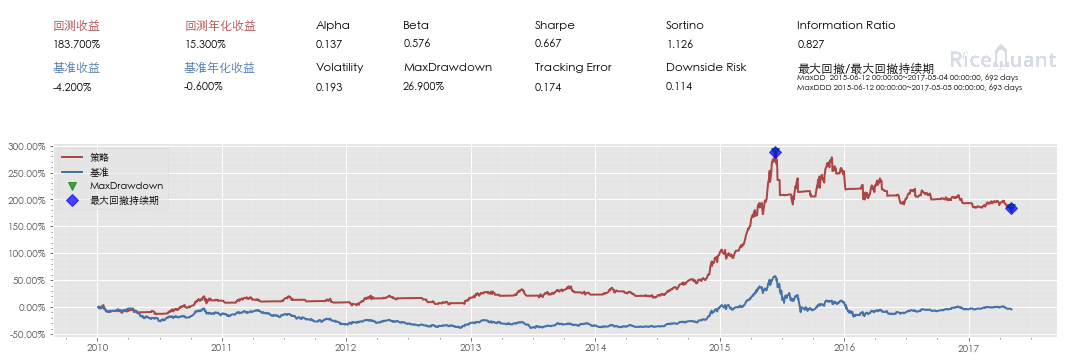

In [9]:
config = {
  "base": {
    "start_date": "2010-01-01",
    "end_date": "2017-05-05",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}


from rqalpha.api import *
from rqalpha import run_func


def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']

    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        
        
results = run_func(init=init, handle_bar=handle_bar, config=config)

In [10]:
report = results["sys_analyser"]

In [11]:
report["trades"][:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2010-01-04 15:00:00,79.961424,1498454089,122.34,817,000012.XSHG,1498454073,None,BUY,国债指数,0,2010-01-04 15:00:00,79.961424
2010-01-06 15:00:00,79.948352,1498454090,122.32,817,000012.XSHG,1498454074,None,SELL,国债指数,0,2010-01-06 15:00:00,79.948352
2010-01-06 15:00:00,76.444704,1498454091,4550.28,21,000905.XSHG,1498454075,None,BUY,中证500(沪),0,2010-01-06 15:00:00,76.444704
2010-01-07 15:00:00,74.913888,1498454092,4459.16,21,000905.XSHG,1498454076,None,SELL,中证500(沪),0,2010-01-07 15:00:00,74.913888
2010-01-07 15:00:00,78.180552,1498454093,122.31,799,000012.XSHG,1498454077,None,BUY,国债指数,0,2010-01-07 15:00:00,78.180552
